In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [2]:
train =  pd.read_csv('../train.csv')
test =  pd.read_csv('../test.csv')

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)
X = train.drop('satisfaction', axis=1)

Train data shape: (103904, 25)
Test data shape: (25976, 25)


In [3]:

df = pd.DataFrame(X)

# Apply LabelEncoder to each column
X = LabelEncoder()
X = df.apply(X.fit_transform)

# Print the transformed DataFrame
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,6,1,2,358,3,4,3,1,...,5,5,4,3,3,4,5,5,25,18
1,1,1,18,0,0,144,3,2,3,3,...,1,1,1,5,2,1,4,1,1,6
2,0,0,19,0,0,994,2,2,2,2,...,5,5,4,3,3,4,4,5,0,0
3,0,0,18,0,0,446,2,5,5,5,...,2,2,2,5,2,1,4,2,11,9
4,1,0,54,0,0,124,3,3,3,3,...,5,3,3,4,3,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,16,0,1,102,2,1,2,3,...,2,2,3,1,3,2,3,2,3,0
103900,1,0,42,0,0,2143,4,4,4,4,...,5,5,5,5,4,5,5,4,0,0
103901,1,1,23,0,0,1791,1,1,1,3,...,5,4,3,2,3,5,5,4,7,14
103902,0,1,15,0,1,860,1,1,1,5,...,1,1,4,5,0,5,4,1,0,0


In [4]:






# Create a K-Means object
kmeans = KMeans(n_clusters=2)  # Specify the number of clusters (k)

# Train the K-Means model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

Cluster Labels: [1 1 1 ... 0 1 0]
Cluster Centers: [[4.97097134e-01 3.17826572e-02 3.53053591e+01 1.09006327e-01
  1.63825828e-01 2.45230320e+03 2.73796055e+00 2.98046148e+00
  2.88838854e+00 2.99400819e+00 3.31834760e+00 3.70066989e+00
  3.77569780e+00 3.63866766e+00 3.60401935e+00 3.63937477e+00
  2.74197990e+00 3.44194269e+00 3.73669520e+00 3.48016375e+00
  1.44087830e+01 1.59762188e+01]
 [4.90952047e-01 2.35311681e-01 3.13583353e+01 3.80611159e-01
  7.44229821e-01 5.55161461e+02 2.72679596e+00 3.08814290e+00
  2.71103669e+00 2.97090895e+00 3.16159099e+00 3.09330945e+00
  3.32209154e+00 3.26031363e+00 3.30504712e+00 3.25048680e+00
  2.59341330e+00 3.25627645e+00 3.60684892e+00 3.21874757e+00
  1.47909754e+01 1.65169795e+01]]


In [5]:
y_test = test['satisfaction']
test = test.drop('satisfaction', axis=1)
df = pd.DataFrame(test)

# Apply LabelEncoder to each column
enc = LabelEncoder()
test = df.apply(enc.fit_transform)

# Print the transformed DataFrame
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,45,0,1,70,5,4,3,3,...,2,5,5,5,4,1,5,5,50,44
1,0,0,29,0,0,2300,1,1,3,0,...,4,4,4,4,3,2,4,5,0,0
2,1,1,13,0,1,95,2,0,2,3,...,1,2,4,1,2,1,2,2,0,0
3,1,0,37,0,0,2740,0,0,0,1,...,3,1,1,1,0,2,1,4,0,6
4,0,0,42,0,1,926,2,3,4,2,...,1,2,2,2,1,3,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,27,0,0,389,3,3,3,0,...,3,4,3,2,3,3,5,4,0,0
25972,1,0,16,0,0,495,4,4,4,3,...,3,4,4,5,4,4,5,4,0,0
25973,0,0,10,1,1,641,2,5,1,4,...,1,2,4,3,3,4,4,2,0,0
25974,1,0,7,0,0,886,3,3,3,2,...,3,4,3,2,4,3,5,4,0,0


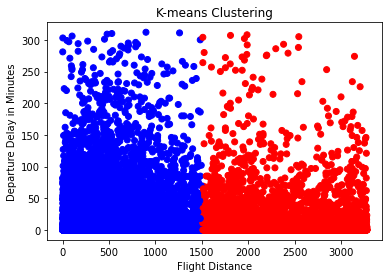

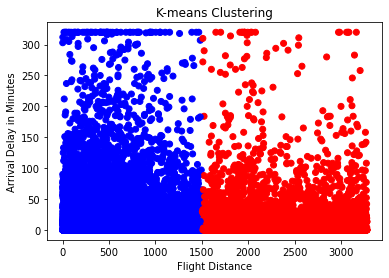

In [6]:
predictions = kmeans.predict(test)

# print("New data point predictions:")
# for i, prediction in enumerate(predictions):
#     print(f"Data point {i}: Cluster {prediction}")

# Create a colormap for the scatter plot
colors = ['red', 'blue']

# Plot the clusters
plt.scatter(test["Flight Distance"], test["Departure Delay in Minutes"], c=[colors[prediction] for prediction in predictions])
plt.xlabel('Flight Distance')
plt.ylabel('Departure Delay in Minutes')
plt.title('K-means Clustering')
plt.show()


# Plot the clusters
plt.scatter(test["Flight Distance"], test["Arrival Delay in Minutes"], c=[colors[prediction] for prediction in predictions])
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay in Minutes')
plt.title('K-means Clustering')
plt.show()


In [7]:

silhouette_avg = silhouette_score(test, predictions)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.6962576846504438


In [8]:
predictions = pd.DataFrame(predictions)
enc = LabelEncoder()
y_test =pd.DataFrame( y_test)
# y_test = y_test.replace({'satisfied': 0, 'neutral or dissatisfied': 1})
y_test = y_test.apply(enc.fit_transform)
# print(y_test)
# y_test
# assert y_test.shape == predictions.shape, "DataFrames should have the same shape"
y_test = y_test.values
predictions = predictions.values
predictions = np.where(predictions == 1, 0, 1)

# Calculate accuracy by comparing the labels or values
accuracy = (y_test == predictions).mean()

print("Accuracy:", accuracy*100,"%")

Accuracy: 64.68663381582999 %
